# Plotting and Equation Solving

:::{admonition} Learning Objectives  
Be able to:
* import libraries `numpy`, `sympy`, `matplotlib`;
* symbolically manipulate an equation using `sympy.solve()`;
* generate x and y data for a function using `numpy.linspace()`;
* plot the x, y data using `matplotlib.pyplot.plot()`;
* add horizontal lines and text to a plot; and
* use pandas `read_csv` to open a data file
* group (aggregate) data using pandas:  `groupby()`, `sum()`, `mean()`
:::

*You will need the following extensions:*

:::{index} sympy solvers
:::

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sympy.solvers import solve #for solving equations symbolically
from sympy import symbols #for solving equations symbolically

## Hints for [Problem 1](04:exercises:prob_1)

 $$  \mathbf{\text{% crystallinity} =  \frac{\rho_c (\rho_s - \rho_a)}{\rho_s (\rho_c - \rho_a)} * 100} $$

For this problem you will need to define a function to find the crystallinity based on the values of density as shown above.  Your function should look like: 

In [ ]:
def crystallinity(density_s, density_a, density_c):
    percent_crys=   # finish this statement
    return percent_crys

crystallinity(0.925, 0.870, 0.998)  # checking your function output

Write a function that takes percent_crystallinity, crystalline_density and amorphous_density and returns the sample density. For example,  

```python
def sample_density(percent_crystallinity, density_a, density_c):  
     density_s=   #finish this equation
     return density_s
```

To find the equation for the sample density, you will want to solve the crystallinity equation for the sample_density. You can do this using `sympy` after loading the following packages:  

```python
from sympy.solvers import solve #for solving equations symbolically
from sympy import symbols #for solving equations symbolically
```

:::{index} solving equations, sympy, symbolic solvers, symbols, sympy.solvers.solve, solve
:::

### Example of solving an equation
Let's say you wanted to solve the equation $a x^2 + b x + c = d$.  First, we tell python that a,b,c,d,x are symbols.  

In [3]:
from sympy.solvers import solve #for solving equations symbolically
from sympy import symbols #for solving equations symbolically

In [4]:
a,b,c,d,x = symbols('a b c d x')

Then we can use the solve command.

:::{important}  
The equation that goes into the solve command must equal zero so we rewrite $a x^2 + b x + c = d$   as   $a x^2 + b x + c - d=0$.  Notice that we do not include the "=0" part in the solve function below because that is assumed.  
:::

:::{index} solve, sympy solve, symbols, symbolic solve
:::

In [5]:
# solve for x
solve(a*x**2+b*x+c-d, x)

[(-b - sqrt(-4*a*c + 4*a*d + b**2))/(2*a),
 (-b + sqrt(-4*a*c + 4*a*d + b**2))/(2*a)]

In [6]:
def x_solution(a,b,c,d):
    return (-b + np.sqrt(-4*a*c + 4*a*d + b**2))/(2*a)

x_solution(2,9,5,10)

0.5

In [7]:
x_solution(2,9,0.4,10)

0.8904617494884413

**Let's find our x solution for different values of the parameter "d"**

:::{index} np.linspace, linspace, list comprehension
:::

The `np.linspace(min, max, numpts)` creates evenly spaced points between two numbers.  The number of points you want is given by the third number.

In [16]:
dd=np.linspace(0,5,5) #first pt =0, last point=5, total points=5
print('linspace list dd = ',dd)
[x_solution(2,9,5,d) for d in dd] #list comprehension loop

linspace list dd =  [0.   1.25 2.5  3.75 5.  ]


[-0.6492189406417879,
 -0.4646428928642874,
 -0.2974375810233365,
 -0.14346255670591024,
 0.0]

**Let's use the above method to find x solutions for 20 d values between 0 and 50.  Example annotations are also included in the plot.**  

:::{index} annotate plots, plt.plot, plot, xlabel, ylabel, plt.show
:::

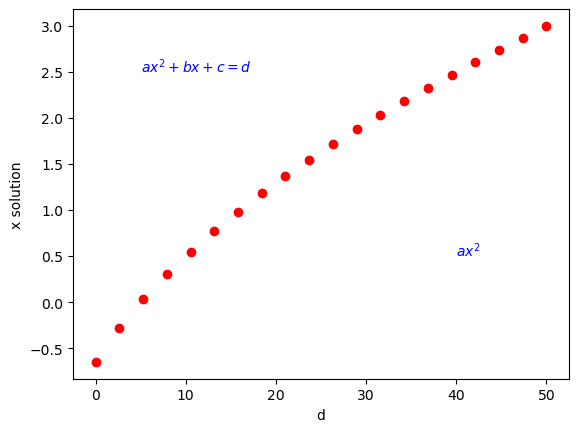

In [17]:
d=np.linspace(0, 50, 20) #creates 20 evenly spaced d-values from 0 to 50
x_sol=x_solution(2,9,5,d)
plt.plot(d,x_sol,'ro')
plt.xlabel('d')
plt.ylabel('x solution')
plt.annotate('$a x^2 + b x + c = d$', xy=(5, 2.5), color='b') # you can include text on your plot
plt.annotate('$a x^2$', xy=(40, 0.5), color='b') # you can include text on your plot
plt.show()

## Hints for [Problem 2](04:exercises:prob_2) 

Last week we calculated the value of $\left(4\times \frac{\text{pts in circle}}{\text{total num pts}}\right)$ for 1000 random points.  This week you will plot the value as a function of the number of random points.  That is, you want to write a function that takes a parameter, $n$, for the total number of points and returns the value $\left(4\times \frac{\text{pts in circle}}{\text{total num pts}}\right)$. 

My code for 1000 random points was:  

```python
xcoord=(2)*np.random.random(1000)-1 #1000 random pts from -1 to 1
ycoord=(2)*np.random.random(1000)-1 #1000 random pts from -1 to 1
magnitude=np.sqrt(xcoord**2+ycoord**2) #length from center (0,0) to point
mag_test=magnitude<=1
4*len(xcoord[mag_test])/len(xcoord)
```

Check what `len(xcoord[magnitude<=1])` and `len(xcoord)` does in my code above.  

:::{index} len
:::

Since your n value in this problem will vary from 100 to 1,000,000 (i.e. several orders of magnitude) it is better to use `geomspace()` rather than `linspace()`. `geomspace()` gives pts spaced on a log scale which is much better when our values change by orders of magnitude. 

*Don't forget that your function above requires an integer to be input so you will want to make sure geomspace() is giving you an integer or round your list to the nearest integer.* 

:::{index} np.geomspace, geomspace
:::

In [23]:
xdata=np.geomspace(100,1e6,num=50, dtype=int) #tell it to round to the closest integer dtype=int
print('geomspace: notice the nice sample of values across all magnitudes\n')
print(xdata)
# notice the increasing step size as our numbers get larger
# compare this to linspace
print('\nlinspace: notice this skips from 100 to 20506 for the first point\n')
print(np.linspace(100, 1e6, num=50, dtype=int))

geomspace: notice the nice sample of values across all magnitudes

[    100     120     145     175     212     255     308     372     449
     542     655     790     954    1151    1389    1676    2023    2442
    2947    3556    4291    5179    6250    7543    9102   10985   13257
   15998   19306   23299   28117   33932   40949   49417   59636   71968
   86851  104811  126485  152641  184206  222299  268269  323745  390693
  471486  568986  686648  828642 1000000]

linspace: notice this skips from 100 to 20506 for the first point

[    100   20506   40912   61318   81724  102130  122536  142942  163348
  183755  204161  224567  244973  265379  285785  306191  326597  347004
  367410  387816  408222  428628  449034  469440  489846  510253  530659
  551065  571471  591877  612283  632689  653095  673502  693908  714314
  734720  755126  775532  795938  816344  836751  857157  877563  897969
  918375  938781  959187  979593 1000000]


## Hints for [Problem 3](04:exercises:prob_3)

Import the csv file [titanic.csv](https://drive.google.com/uc?export=download&id=1ELCvnr0WjQcglNlmxhqzsAOK8DnPaHW_) and (a) determine the percentage of woman that survived and the percentage of men that survived and (b) determine the average ticket price (Fare) for those that survived versus those that did not survive.  0 = did not survive. 1 = survived.

Last week we learned how to use pandas to import an excel file; clean imported data including dropping NAN, filling NAN, renaming columns, dropping rows, sorting, slicing, and adding new columns.

*Now we need to learn how to group (aggregate) data:  `groupby()`, `sum()`, `mean()`  
Let's take a look at a data file containing information about the insulation thickness from a wire coat machine versus several parameters.  

In [25]:
# This is a direct read of the file "raw_clean_cable_insulation.csv" from a google drive. 
raw=pd.read_csv('https://drive.google.com/uc?id=1zmsrtUgXZhJJzERQXFKkUVoCD1zNbBSr')
raw.head(3) #looking at only first 3 records

,Unnamed: 0.1,Unnamed: 0,ExtrTemp,LineSpeed,WaterTemp,Measure,City
0,0,0,234.83,55.28,26.67,170.67,Kairo
1,1,1,235.09,54.13,26.97,182.86,Kairo
2,2,2,235.09,54.33,27.46,182.74,Kairo


In [26]:
# dropping first two columns here since I don't need them
df=raw.drop(['Unnamed: 0.1','Unnamed: 0'],axis=1)
df

,ExtrTemp,LineSpeed,WaterTemp,Measure,City
0,234.83,55.28,26.67,170.67,Kairo
1,235.09,54.13,26.97,182.86,Kairo
2,235.09,54.33,27.46,182.74,Kairo
3,235.05,55.00,26.83,175.49,Kairo
4,235.04,55.26,26.62,172.80,Kairo
...,...,...,...,...,...
9992,234.92,55.09,26.98,173.84,Cairo
9993,235.22,55.91,27.30,171.86,Cairo
9994,235.13,55.43,26.99,173.59,Cairo
9995,235.05,54.73,26.73,177.21,Cairo


In [29]:
# rounding some of the numbers so they group better
# i.e. 234.92 and 235.22 etc should all just be 235.  
# you won't need to do this for the titanic data
df['LineSpeed']=df.loc[:,'LineSpeed'].round(1)
df['ExtrTemp']=df.loc[:,'ExtrTemp'].round(0)
df

,ExtrTemp,LineSpeed,WaterTemp,Measure,City
0,235.0,55.3,26.67,170.67,Kairo
1,235.0,54.1,26.97,182.86,Kairo
2,235.0,54.3,27.46,182.74,Kairo
3,235.0,55.0,26.83,175.49,Kairo
4,235.0,55.3,26.62,172.80,Kairo
...,...,...,...,...,...
9992,235.0,55.1,26.98,173.84,Cairo
9993,235.0,55.9,27.30,171.86,Cairo
9994,235.0,55.4,26.99,173.59,Cairo
9995,235.0,54.7,26.73,177.21,Cairo


1. Let's find the percentage of Measurements made in Alexandria vs the total number of measurements.  
2. Let's also find the average WaterTemp for all measurements made in Alexandria at an ExtrTemp of 235.0  

In [33]:
# groupby collects all records for the different cities and then
# .count() counts how many records there are in each city grouping
dfgroup=df.groupby(['City']).count()
dfgroup

,ExtrTemp,LineSpeed,WaterTemp,Measure
City,,,,
Alexandria,5520,5520,5520,5520
CAI,17,17,17,17
Cairo,4413,4413,4413,4413
Kairo,47,47,47,47


In [34]:
# using .sum() we can get the total number of records in each column
# by default .sum() sums down columns
dfgroup.sum()

ExtrTemp     9997
LineSpeed    9997
WaterTemp    9997
Measure      9997
dtype: int64

In [35]:
# calculating percent of records in Alexandria vs total of 9997
# using .loc[] to pull from dataframe "dfgroup.loc[row, column]"
dfgroup.loc['Alexandria','Measure']/9997*100 #percent

55.21656496949085

In [36]:
# now we are grouping by two columns
# we first collect the Cities
# then group within each city by the ExtrTemp (extruder temperature)
# here we take the mean or average value in these two categories for each column
dfmean=df.groupby(['City','ExtrTemp']).mean()
dfmean

LineSpeed  WaterTemp     Measure
City       ExtrTemp                                  
Alexandria 234.0     54.894118  27.056471  170.712353
           235.0     55.003924  26.999927  175.425584
           236.0     55.115152  27.000606  180.169091
CAI        235.0     55.176471  26.965882  174.288235
Cairo      234.0     54.980645  27.035806  169.769032
           235.0     54.994089  26.993054  175.444202
           236.0     55.014706  27.005294  181.228824
Kairo      235.0     55.093617  26.941915  174.370426

In [37]:
# the mean value of WaterTemp in Alexandria at an ExtrTemp of 235 degrees is
# note row is ('Alexandria',235.0) and the column we want is 'WaterTemp'
dfmean.loc[('Alexandria',235.0), 'WaterTemp']

26.999926645883

### Pivot Table

For a lot more control, we could use pivot_table to specify different aggregation functions for each column of values we want to analyze.  You should be able to do what you want with groupby() but the pivot_table is a more manual way to specify many options.  

:::{index} pd.pivot_table, pivot_table
:::

In [41]:
pd.pivot_table(df, values=['Measure', 'WaterTemp','LineSpeed'], index=['City', 'ExtrTemp'],
                    aggfunc={'Measure': np.mean,
                             'WaterTemp': [min, max, np.mean],
                            'LineSpeed':[np.sum,np.mean,np.size]}).style

## Exercises

(04:exercises:prob_1)=
### Problem 1: 

*Computations of the Density and Percent Crystallinity of Polyethylene (Callister 10th ed., section 14.11)*
        
The % crystallinity is given by:

 $$  \mathbf{\text{% crystallinity} =  \frac{\rho_c (\rho_s - \rho_a)}{\rho_s (\rho_c - \rho_a)} * 100} $$

(1) Write a function that calculates the percent crystallinity of a branched polyethylene sample $\rho_s$ that has a density of  $0.925\ 𝑔\ 𝑐𝑚^{-3}$ . The density of a totally amorphous material $\rho_a$ is  $0.870 \ 𝑔\ 𝑐𝑚^{-3}$  and the density of a totally crystalline $\rho_c$ material is  $0.998 \ 𝑔\ 𝑐𝑚^{-3}$ .

(2) Calculate the sample density $\rho_s$ versus % crystallinity and reproduce the plot below (including the horizontal lines and text). To find the equation for the sample density use the solve commands from `sympy` to solve the above crystallinity equation for $\rho_s$. An example of using solve can be found in this lesson.  

(3) Export your data to an excel file. 

:::{image} ../images/04_2114_prob_1.png
:width: 400px
:align: center
:::

<img alt="../images/04_2114_prob_1.png" src="../images/04_2114_prob_1.png" width=400px>

(04:exercises:prob_2)=
### Problem 2:

Write a function that finds "x" random points in a square of edge length 2 centered at (0,0). Determines how many of these points are contained in a circle of radius 1 centered at (0,0). Returns the value $\left(4\times \frac{\text{pts in circle}}{\text{total num pts}}\right)$.  Plot the value $\left(4\times \frac{\text{pts in circle}}{\text{total num pts}}\right)$ versus number of points, x. **Your x should vary between 100 and 1e6**.  Also include a horizontal line at the value of pi on your plot.  

(04:exercises:prob_3)=
### Problem 3: 

Import the csv file "titanic.csv" and (a) determine the percentage of woman that survived and the percentage of men that survived and (b) determine the average ticket price (Fare) for those that survived versus those that did not survive.  0 = did not survive. 1 = survived.  